In [44]:
# Типы шкал:

# 1. Номинальная (категориальная) - условные имена для переменных. (Какой-то код или сорт растения) Невозможно сравнение по типу «больше-меньше» Разновидность: Дихотомическая - переменная принимает одно из двух значений (муж / жен или 1/0) Является качественной

# 2. Порядковая (Ранговая) - значения можно сравнивать между собой, но величина разности значения не имеет.(Образование - среднее, высшее, начальное, Оценки в бальной системе) Является качественной

# 3. Количественная - позволяет отражать количественные характеристики объекта. Номер места, которое занимает наблюдение в упорядоченном списке, называется рангом наблюдения. Количественная шкала может быть разделена на интервальную шкалу и шкалу отношений. Для интервальной важны только разности между значениями, а для шкалы отношения важны и разности и отношения значений. 

# Группирующий переменные и переменные отклика: 

# 1. Независимые признаки - переменные которые используются для объяснения значения других независимых переменных(Пол, доход, состав семьи итп)

# 2. Зависимые признаки -  признаки, значения которых зависят от значения независимых признаков и и даже могут определяться ими. (Оценка покупателем товара)Зависимая переменная - функция независимых

In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder


In [46]:
df = pd.read_csv('./npm-github-depencies-raw-data.csv')

In [47]:
df.columns = ['dependency_name', 'repository', 'github_star', 'gitub_forks', 'github_watchers', 'abondoned', 'code_coverage', 'linters', 'dependenats', 'npm_stars', 'maintainers', 'contributors', 'dependenies', 'license', 'total_issues', 'open_issues', 'security_advisories']
df.tail(10)

# dependency_name        название репозитория (Номинальная)
# repository             ссылка на репозиторий (Номинальная)
# github_star            количество звезд на Github (Количественная Группируюшая)
# gitub_forks            количество форков на Github (Количественная отклик)
# github_watchers        количество watcher на Github (Количественная отклик)
# abondoned              заброшен (Дихотомическая группирующая)
# code_coverage          покрытие кода (Ранговая)
# linters                линтнеры (Ранговая)
# dependenats            иждивенцы (Количественная отклик)
# npm_stars              количество звезд на npm (Количественная отклик)
# maintainers            сопровождающие (Количественная)
# contributors           количество контрибьюторов (Количественная группирующая)
# dependenies            количество зависимостей (Количественная)
# license                лицензия (Номинальная)
# total_issues           всего issues (Количественная)
# open_issues            не закрыто issues (Количественная)
# security_advisories    количество рекомендаций по безопасности (Количественная)

,dependency_name,repository,github_star,gitub_forks,github_watchers,abondoned,code_coverage,linters,dependenats,npm_stars,maintainers,contributors,dependenies,license,total_issues,open_issues,security_advisories
9777,imagemin-jpegoptim,https://github.com/millermedeiros/nodefy,63,10,2,False,NaN,0,3.0,1.0,1,0,5,MIT,16.0,7.0,1
9778,nodefy,https://github.com/ashnur/random-number,12,3,2,False,NaN,0,46.0,0.0,1,0,0,BSD-2-Clause,2.0,0.0,2
9779,random-number,https://github.com/lamp/superagent-jsonp,25,22,4,False,NaN,2,23.0,0.0,1,0,1,WTFPL,32.0,3.0,0
9780,superagent-jsonp,https://github.com/resin-io/node-resin-lint,3,3,15,False,NaN,4,0.0,0.0,1,0,18,Apache-2.0,80.0,16.0,0
9781,resin-lint,https://github.com/bahamas10/node-easyreq,2,0,0,False,NaN,0,9.0,0.0,1,0,1,MIT,0.0,0.0,4
9782,easyreq,https://github.com/gavinning/aimee-extend,0,0,1,False,NaN,0,13.0,0.0,1,0,1,GPL-3.0,0.0,0.0,0
9783,aimee-extend,https://github.com/coolaj86/abstract-http-request,50,6,3,False,NaN,0,10.0,1.0,1,1,9,NaN,29.0,10.0,0
9784,ahr2,https://github.com/haraldrudell/mochawrapper,16,2,2,False,NaN,0,1.0,0.0,1,1,5,NaN,0.0,0.0,0
9785,mochawrapper,https://github.com/jcrugzz/back,26,6,2,False,NaN,0,27.0,0.0,1,1,1,MIT,6.0,0.0,8
9786,back,https://github.com/jcrugzz/back,26,26,6,False,NaN,0,8.0,2.0,1,3,7,AGPL-3.0,NaN,0.0,0


In [48]:
df.dtypes

dependency_name         object
repository              object
github_star              int64
gitub_forks              int64
github_watchers          int64
abondoned                 bool
code_coverage          float64
linters                  int64
dependenats            float64
npm_stars              float64
maintainers              int64
contributors             int64
dependenies              int64
license                 object
total_issues           float64
open_issues            float64
security_advisories      int64
dtype: object

In [49]:
len(df)

9787

In [50]:
df.isnull().sum()

dependency_name           0
repository                0
github_star               0
gitub_forks               0
github_watchers           0
abondoned                 0
code_coverage          7846
linters                   0
dependenats               5
npm_stars                 5
maintainers               0
contributors              0
dependenies               0
license                 668
total_issues            654
open_issues             206
security_advisories       0
dtype: int64

In [51]:
def f(lst):
  elems = {}
  e, em = None, 0
  for i in lst:
    elems[i] = t = elems.get(i, 0) + 1
    if t > em:
      e, em = i, t
      return e

In [52]:
df.drop('code_coverage', inplace=True, axis=1)

df['dependenats'] = df['dependenats'].fillna(df['dependenats'].mean())
df['npm_stars'] = df['npm_stars'].fillna(df['npm_stars'].mean())
df['license'] = df['license'].fillna(f(df.license))
df['total_issues'] = df['total_issues'].fillna(df['total_issues'].mean())
df['open_issues'] = df['open_issues'].fillna(df['open_issues'].mean())

df.dropna()

,dependency_name,repository,github_star,gitub_forks,github_watchers,abondoned,linters,dependenats,npm_stars,maintainers,contributors,dependenies,license,total_issues,open_issues,security_advisories
0,mocha,https://github.com/mochajs/mocha,20919,2904,395,False,3,6929.0,704.0,4,530,24,MIT,4732.000000,264.0,0
1,chai,https://github.com/chaijs/chai,7421,674,127,False,0,6230.0,317.0,2,4,6,MIT,1417.000000,74.0,0
2,lodash,https://github.com/lodash/lodash,51471,6123,877,False,0,102292.0,1520.0,3,2,0,MIT,5165.000000,315.0,0
3,grunt,https://github.com/gruntjs/grunt,12128,1529,515,False,1,2147.0,692.0,4,5,15,MIT,1720.000000,155.0,0
4,eslint,https://github.com/eslint/eslint,19564,3501,306,False,2,13016.0,334.0,4,0,38,MIT,14848.000000,112.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9782,easyreq,https://github.com/gavinning/aimee-extend,0,0,1,False,0,13.0,0.0,1,0,1,GPL-3.0,0.000000,0.0,0
9783,aimee-extend,https://github.com/coolaj86/abstract-http-request,50,6,3,False,0,10.0,1.0,1,1,9,MIT,29.000000,10.0,0
9784,ahr2,https://github.com/haraldrudell/mochawrapper,16,2,2,False,0,1.0,0.0,1,1,5,MIT,0.000000,0.0,0
9785,mochawrapper,https://github.com/jcrugzz/back,26,6,2,False,0,27.0,0.0,1,1,1,MIT,6.000000,0.0,8


In [53]:
df.isnull().sum()

dependency_name        0
repository             0
github_star            0
gitub_forks            0
github_watchers        0
abondoned              0
linters                0
dependenats            0
npm_stars              0
maintainers            0
contributors           0
dependenies            0
license                0
total_issues           0
open_issues            0
security_advisories    0
dtype: int64

                      dependency_name  \
1305           apeman-asset-templates   
4741           react-style-normalizer   
2819            gulp-closure-compiler   
1962                     request-json   
6427                        good-file   
...                               ...   
44                          react-dom   
6934  react-addons-linked-state-mixin   
5370            vue-template-compiler   
7981                    sdp-transform   
331                               vue   

                                             repository  github_star  \
1305  https://github.com/apeman-asset-labo/apeman-as...           -1   
4741  https://github.com/radubrehar/react-style-norm...           -1   
2819    https://github.com/steida/gulp-closure-compiler           -1   
1962        https://github.com/hackervents/request-json           -1   
6427                https://github.com/hapijs/good-file           -1   
...                                                 ...          ...   
44 

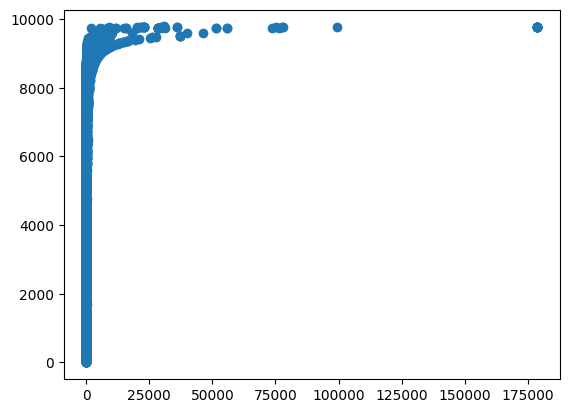

In [59]:
df_1= df.sort_values('github_star')
print(df_1)

m = []
for i in range(9787):
    m.append(i)
    
plt.scatter(df_1['gitub_forks'], m)

In [57]:
df_2= df.sort_values('abondoned')
print(df_2)

m = []
for i in range(9787):
    m.append(i)
    
plt.scatter(df_2['gitub_watchers'], m)

                 dependency_name  \
0                          mocha   
6522                     gl-axes   
6523                    demolish   
6524               lodash.isdate   
6525                    bem-xjst   
...                          ...   
6269               promised-exec   
2638               grunt-regarde   
7001         phosphor-disposable   
564                  ape-testing   
2290  apeman-dev-commons-testing   

                                             repository  github_star  \
0                      https://github.com/mochajs/mocha        20919   
6522           https://github.com/mikolalysenko/gl-axes           22   
6523              https://github.com/unshiftio/demolish            1   
6524                   https://github.com/lodash/lodash        49890   
6525                    https://github.com/bem/bem-xjst          114   
...                                                 ...          ...   
6269         https://github.com/yakimchuk/promised-exec        

KeyError: 'gitub_watchers'